# World Happiness Report: Predicting and Classifying Happiness Scores Using Machine Learning

## Project Overview

This project aims to analyze the **World Happiness Report** dataset, which includes happiness metrics for countries worldwide. The key goals are to explore the factors influencing happiness, cluster countries based on these factors, predict happiness scores using regression, and classify countries into happiness tiers using machine learning models.

### Key Objectives:
1. **Exploratory Data Analysis (EDA)**:
   - Understand the distribution of happiness scores and their relationship with various factors like GDP per capita, social support, and life expectancy.
   
2. **Clustering Analysis**:
   - Group countries into clusters based on their happiness and economic metrics using K-means clustering. This helps identify countries with similar happiness profiles.

3. **Regression Analysis**:
   - Use **Linear Regression** to predict happiness scores based on features like GDP per capita, social support, and other indicators.

4. **Classification Analysis**:
   - Classify countries into different happiness tiers (e.g., "Low", "Medium", and "High") using **Logistic Regression** to aid in better understanding and policy-making.

### Steps Involved:
1. **Data Loading and Cleaning**:
   - The dataset was cleaned and preprocessed to handle any missing values and ensure proper data types.
   
2. **Exploratory Data Analysis (EDA)**:
   - Performed descriptive statistics, data visualization, and correlation analysis to explore the relationships between happiness scores and factors like GDP, social support, and life expectancy.

3. **Clustering Countries**:
   - Applied **K-means clustering** to group countries based on their happiness and economic factors. Clusters were visualized to show patterns in happiness distribution among countries.

4. **Predicting Happiness with Regression**:
   - Implemented **Linear Regression** to predict happiness scores based on economic and social factors. The model's performance was evaluated using **Mean Squared Error (MSE)** and **R-squared** values.

5. **Classifying Countries into Happiness Tiers**:
   - Countries were classified into happiness tiers using **Logistic Regression**. The performance of the model was assessed using metrics like **Accuracy**, **Precision**, **Recall**, and **F1-score**.

### Conclusion:
- The exploratory analysis revealed significant correlations between happiness and factors like GDP per capita, social support, and healthy life expectancy.
- **K-means clustering** helped identify groups of countries with similar happiness profiles, which could be useful for policy-making.
- The **regression model** showed limitations in predicting happiness accurately, with a high **Mean Squared Error** and a negative **R-squared**, indicating poor model performance.
- The **classification model** performed reasonably well, achieving an **accuracy of 87.5%** in classifying countries into happiness tiers, though there are areas for improvement.

### Future Work:
- Explore more complex models like **Random Forests** or **Neural Networks** to improve prediction and classification accuracy.
- Consider additional factors or external datasets to enhance the model's predictive power.
- Use clustering results to study country groups in more detail and recommend specific policy actions for improving happiness.



1. Exploratory Data Analysis (EDA)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("2019.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
# Checking the first few rows of the dataset
print(df.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [4]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


In [5]:
# Checking for missing values
print(df.isnull().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [6]:
# Descriptive statistics for numerical columns
print(df.describe())


       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

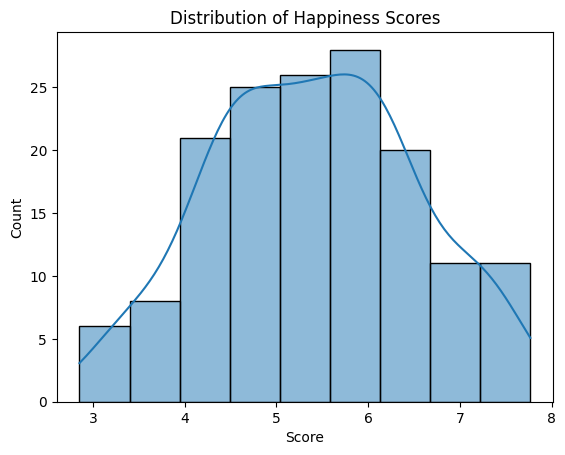

In [7]:
# Visualizing distributions of key variables
sns.histplot(df['Score'], kde=True)
plt.title('Distribution of Happiness Scores')
plt.show()


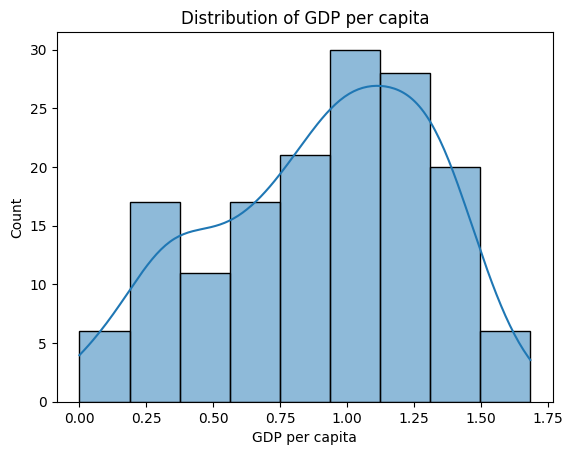

In [8]:
sns.histplot(df['GDP per capita'], kde=True)
plt.title('Distribution of GDP per capita')
plt.show()

In [11]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

In [12]:
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

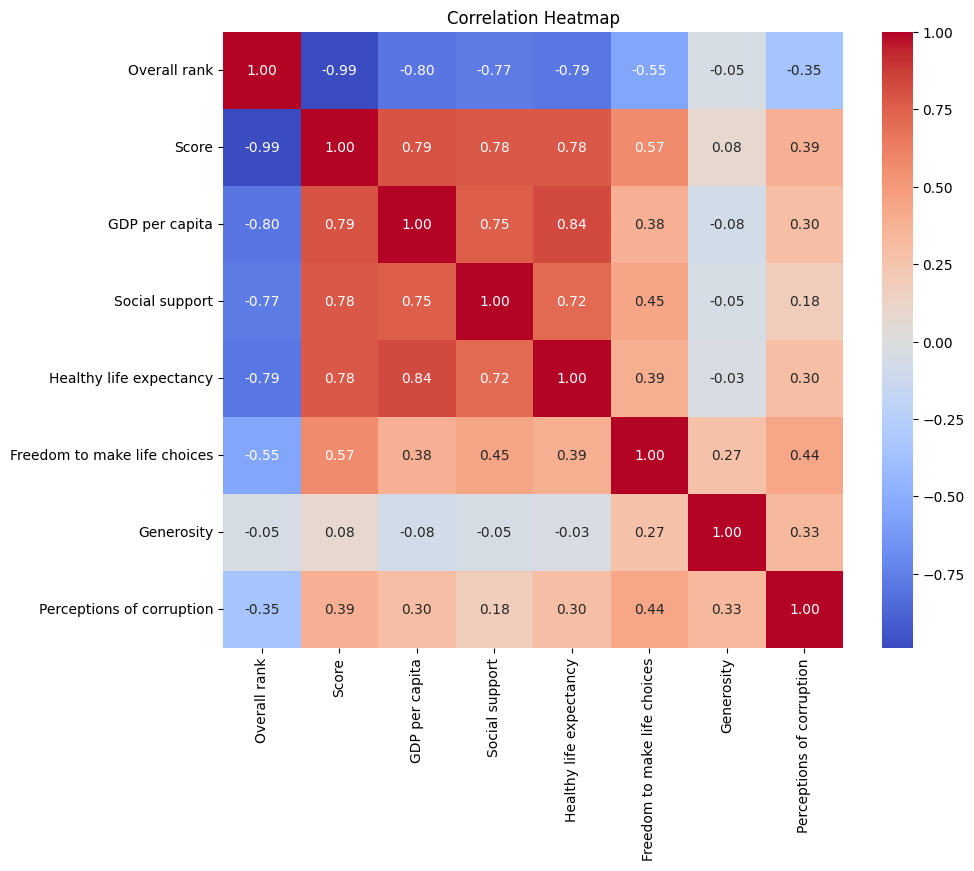

In [13]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

2. Clustering Countries Based on Happiness Scores and Economy Metrics

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
# Selecting relevant features for clustering
features = df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]


In [16]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [17]:
# KMeans clustering with a chosen number of clusters (k=4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

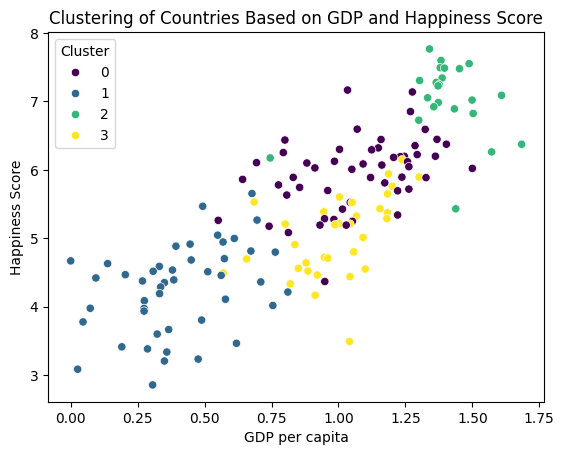

In [18]:
# Visualizing the clusters
sns.scatterplot(x=df['GDP per capita'], y=df['Score'], hue=df['Cluster'], palette='viridis')
plt.title('Clustering of Countries Based on GDP and Happiness Score')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

3. Predicting Happiness Scores Using Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Selecting features and target variable
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Score']

In [22]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Making predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluating the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.4144641383528351
R-squared: 0.6017537913445684


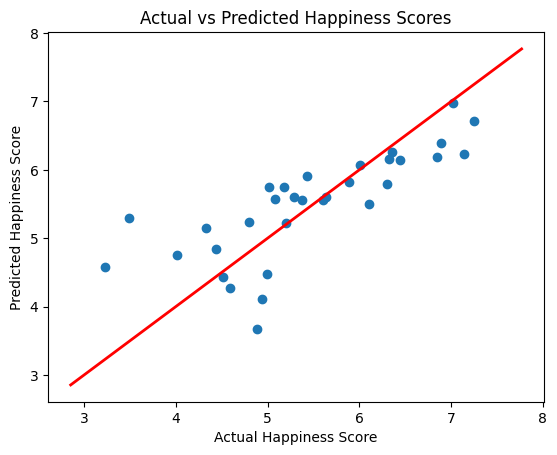

In [26]:
# Visualizing the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()

4. Classifying Countries into Happiness Tiers

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [29]:
 #Categorizing happiness scores into tiers (Low, Medium, High)
bins = [0, 4, 6, 10]  # Defining the thresholds for the tiers
labels = ['Low', 'Medium', 'High']
df['Happiness_Tier'] = pd.cut(df['Score'], bins=bins, labels=labels, right=False)


In [30]:
# Encoding the target variable (Happiness_Tier) as numbers
encoder = LabelEncoder()
df['Happiness_Tier_encoded'] = encoder.fit_transform(df['Happiness_Tier'])

In [31]:
# Features for classification
X_class = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 
              'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y_class = df['Happiness_Tier_encoded']

In [32]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


In [33]:
# Training a Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
# Making predictions
y_pred_class = clf.predict(X_test)

In [35]:
# Evaluating the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_class)}')
print('Classification Report:\n', classification_report(y_test, y_pred_class))

Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.00      0.00      0.00         2
           2       0.83      1.00      0.90        19

    accuracy                           0.88        32
   macro avg       0.61      0.61      0.60        32
weighted avg       0.83      0.88      0.85        32



C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [36]:
# Visualizing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

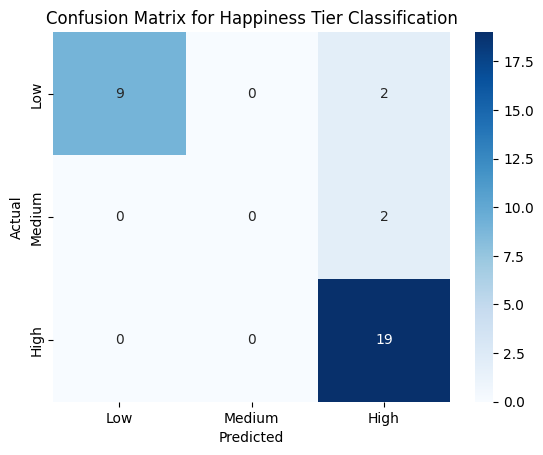

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Happiness Tier Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()